### Expectile GAMs  

Some issues installing `pygam` initially.

In [6]:
!python --version

Python 3.10.12


In [8]:
pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.1 which is incompatible.


In [9]:
# This is a primer from Price Optimization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate data
np.random.seed(0)
n = 100
price = np.sort(np.random.exponential(scale=100, size=n))
quantity = 1000 - 5 * price + np.random.normal(loc=0, scale=50, size=n)
quantity = quantity.clip(min=0)

# Addition of outliers
n_outliers = 10
outlier_prices =  np.random.uniform(5, 50, n_outliers)
outlier_quantity = 1100 + np.random.normal(loc=0, scale=50, size=n_outliers)
price = np.concatenate([price, outlier_prices])
quantity = np.concatenate([quantity, outlier_quantity])

# More outliers - Write a function!
n_outliers = 10
outlier_prices =  np.random.uniform(51, 50, n_outliers)
outlier_quantity = 900 + np.random.normal(loc=0, scale=50, size=n_outliers)
price = np.concatenate([price, outlier_prices])
quantity = np.concatenate([quantity, outlier_quantity])

df = pd.DataFrame({
    'Price': price,
    'Quantity': quantity
})

# Check data
print(df.shape)

# Filter out prices less than 5
df = df[df['Price'] >= 5]
print(df.shape)

#
df.head()

(120, 2)
(115, 2)


,Price,Quantity
5,6.211530,1063.736811
6,6.629740,1025.790280
7,7.368535,954.161081
8,9.116103,900.881854
9,9.865031,1003.397430


Tried install anaconda below. But not really using it!

In [15]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


In [4]:
from pygam import s, ExpectileGAM

In [10]:
### Build model ###

# Re-share data
X = df[['Price']]
y = df[['Quantity']]

# Quantle GAMSs
quantiles = [.025, .5, .975]
gam_results = {}

for q in quantiles:
  gam = ExpectileGAM(s(0), expectile=q) # s, loes smoother?
  gam.fit(X, y)
  gam_results[q] = gam

gam_results

{0.025: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.025, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.5: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.5, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.975: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.975, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False)}

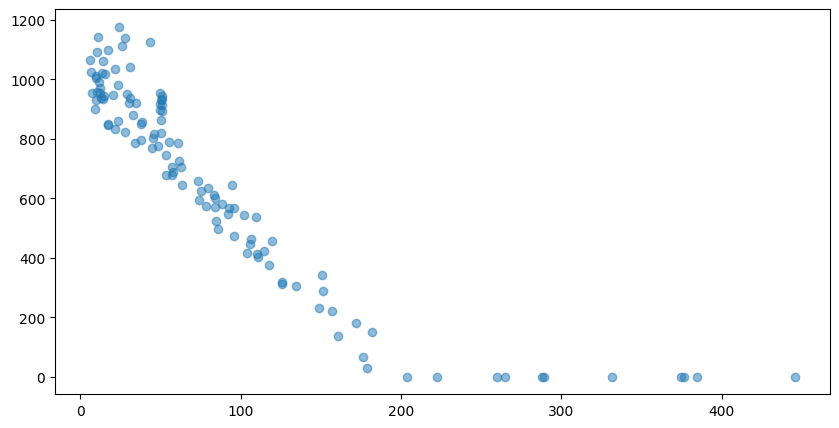

In [24]:
# Pure - Scatter plots
plt.figure(figsize=(10, 5))
plt.scatter(df['Price'],
            df['Quantity'],
            alpha = 0.5,
            label = 'Data Points')

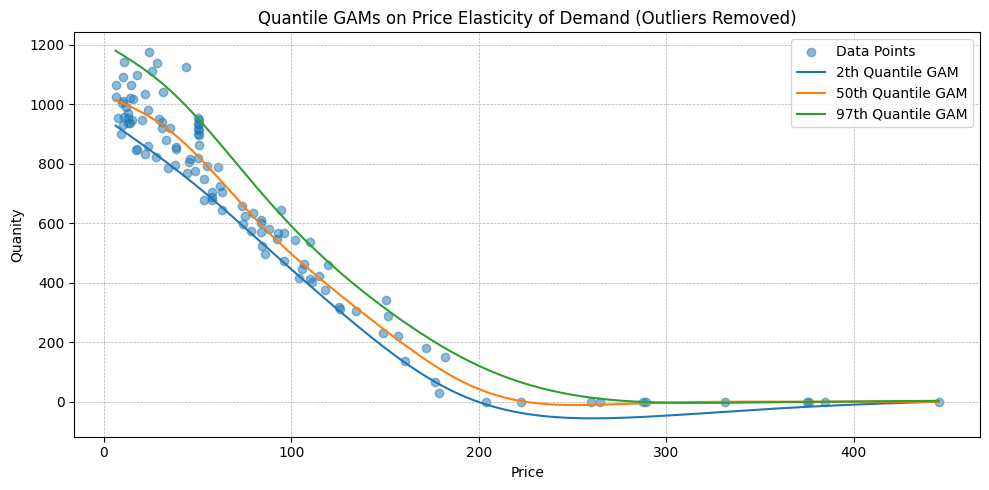

In [27]:
# Plot Quantile GAMs - Scatter plots
plt.figure(figsize=(10, 5))
plt.scatter(df['Price'],
            df['Quantity'],
            alpha = 0.5,
            label = 'Data Points')

XX = np.linspace(df['Price'].min(), df['Price'].max(), 1000)#.reshape[-1, 1]
for q, gam in gam_results.items():
  plt.plot(XX, gam.predict(XX), label=f'{int(q*100)}th Quantile GAM')

# Adding title and labels
plt.xlabel('Price')
plt.ylabel('Quanity')
plt.title('Quantile GAMs on Price Elasticity of Demand (Outliers Removed)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()